In [30]:
import pandas as pd
import numpy as np
import sys
import os
sys.path.append(os.path.abspath(os.path.join(r'C:\Users\user.DESKTOP-OMQ89VA\Desktop\Causal Inference\Causal-Inference\scripts')))
sys.path.append("./scripts")
import eda_script
import plots

# Reading and Loading the data

In [16]:
path = r"C:\Users\user.DESKTOP-OMQ89VA\Desktop\Causal Inference\Causal-Inference\Data\data.csv"
assert os.path.isfile(path)
with open(path, "r") as f:
    pass

df=pd.read_csv(path)
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

# Exploratory Data Analysis

## Data Summary

#### Attribute Information:

ID number

Diagnosis (M = malignant, B = benign)

#### Ten real-valued features are computed for each cell nucleus:
1.radius (mean of distances from center to points on the perimeter)

2.texture (standard deviation of gray-scale values)

3.Perimeter

4.Area

5.smoothness (local variation in radius lengths)

6.compactness (perimeter^2 / area - 1.0)

7.concavity (severity of concave portions of the contour)

8.concave points (number of concave portions of the contour)

9.Symmetry

10.fractal dimension ("coastline approximation" - 1)


The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features


In [24]:
#Checking the column attributes like datatypes, number of entries per column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [26]:
#statistical attributes of the columns
df.describe()

radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean  ...  radius_worst  \
count     569.000000              569.000000  ...    569.000000   
mean        0.181162                0.062798  ...     16.269190   
std         0.027414                0.007060  ...      4.833242   
min         0.106000                0.049960  ...      7.930000   
25%         0.161900                0.057700  ...     13.010000   
50%         0.179200                0.061540  ...     14.970000   
75%         0.195700                0.066120  ...     18.790000   
max         0.304000                0.097440  ...     36.040000   

       texture_worst  perimeter_worst   area_worst  smoothness_worst  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%        29.720000       125.400000  1084.000000          0.146000   
max        49.540000       251.200000  4254.000000          0.222600   

       compactness_worst  concavity_worst  concave points_worst  \
count         569.000000       569.000000            569.000000   
mean            0.254265         0.272188              0.114606   
std             0.157336         0.208624              0.065732   
min             0.027290         0.000000              0.000000   
25%             0.147200         0.114500              0.064930   
50%             0.211900         0.226700              0.099930   
75%             0.339100         0.382900              0.161400   
max             1.058000         1.252000              0.291000   

       symmetry_worst  fractal_dimension_worst  
count      569.000000               569.000000  
mean         0.290076                 0.083946  
std          0.061867                 0.018061  
min          0.156500                 0.055040  
25%          0.250400                 0.071460  
50%          0.282200                 0.080040  
75%          0.317900                 0.092080  
max          0.663800                 0.207500  

[8 rows x 30 columns]

In [19]:
from eda_script import *



## Identifying missing values


In [20]:
#The percentage of missing values in the whole dataset
missing_values(df)

The dataset contains 3.03 % missing values.


In [21]:
# The columns missing data
column_missingdata(df)

(Unnamed: 32                569
 compactness_se               0
 fractal_dimension_worst      0
 symmetry_worst               0
 concave points_worst         0
 concavity_worst              0
 compactness_worst            0
 smoothness_worst             0
 area_worst                   0
 perimeter_worst              0
 texture_worst                0
 radius_worst                 0
 fractal_dimension_se         0
 symmetry_se                  0
 concave points_se            0
 concavity_se                 0
 id                           0
 diagnosis                    0
 area_se                      0
 perimeter_se                 0
 texture_se                   0
 radius_se                    0
 fractal_dimension_mean       0
 symmetry_mean                0
 concave points_mean          0
 concavity_mean               0
 compactness_mean             0
 smoothness_mean              0
 area_mean                    0
 perimeter_mean               0
 texture_mean                 0
 radius_

Only the 'Unnamed: 32 'column has missing values

## Handling missing values

Since the 'Unnamed: 32' column has no data values, it can be dropped'.

The 'id' column also has no statistical value and hence can be dropped

In [23]:
df=df.drop(columns=['id','Unnamed: 32'])

## Graphical Analysis

### Univariate analysis of the features

In [31]:
from plots import *

In [38]:
df.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')>

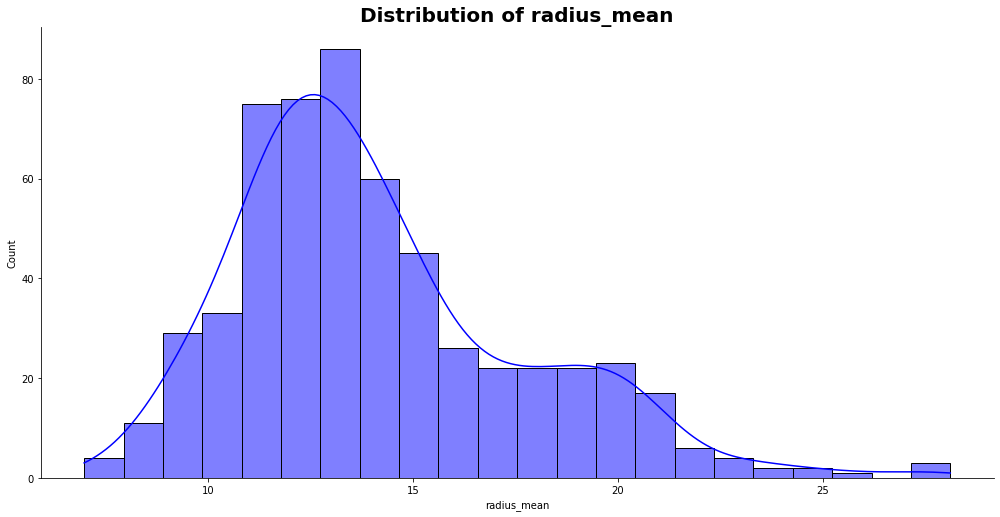

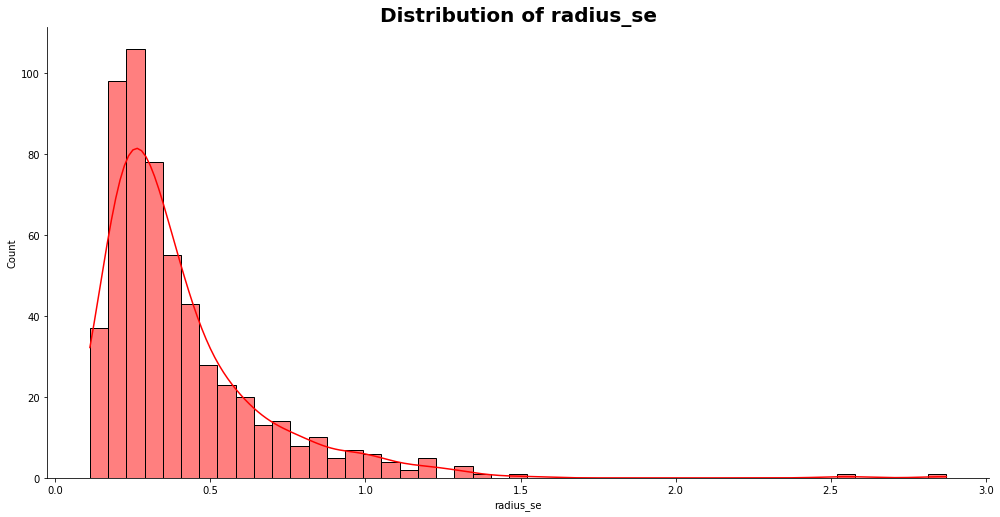

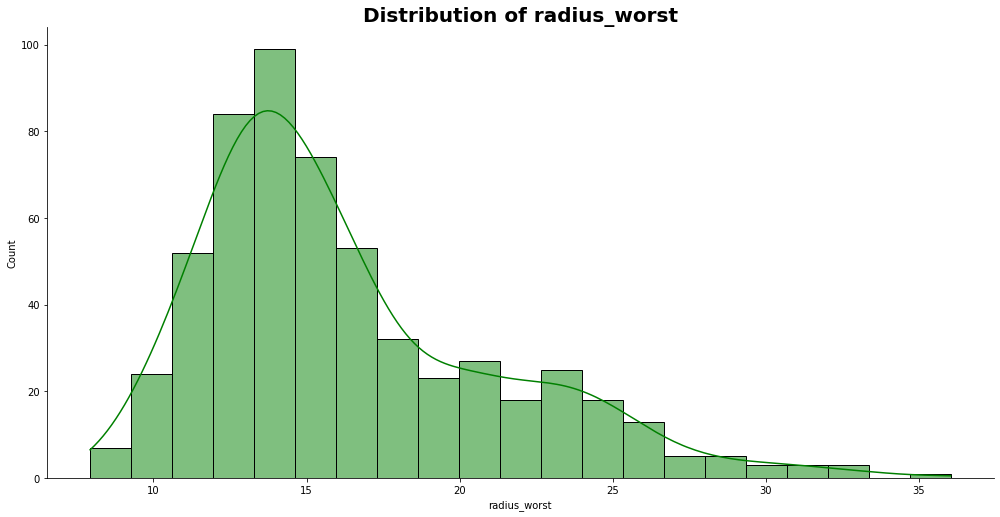

In [40]:
plot_hist(df,'radius_mean','blue')
plot_hist(df,'radius_se','red')
plot_hist(df,'radius_worst','green')

The radius_mean is normally distributed

The radius_se and radius_worst are skewed to the left



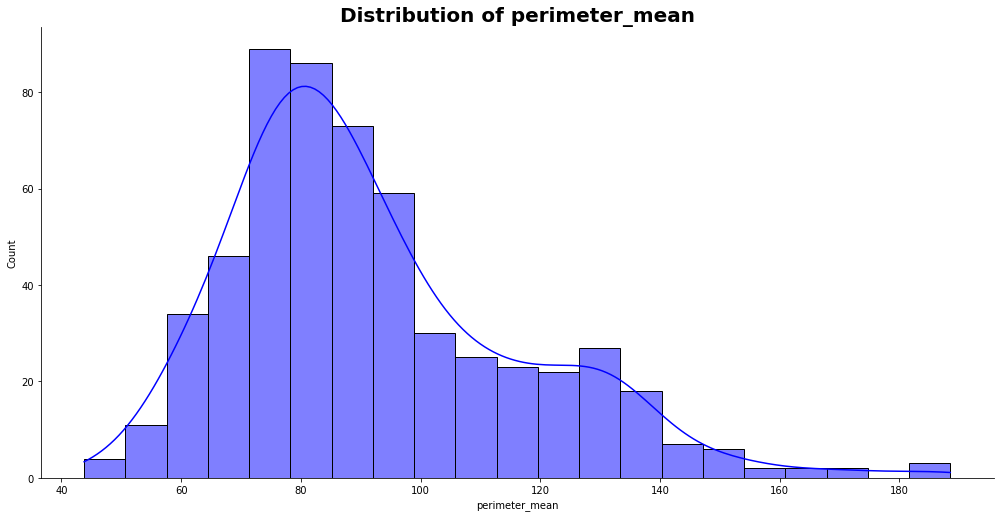

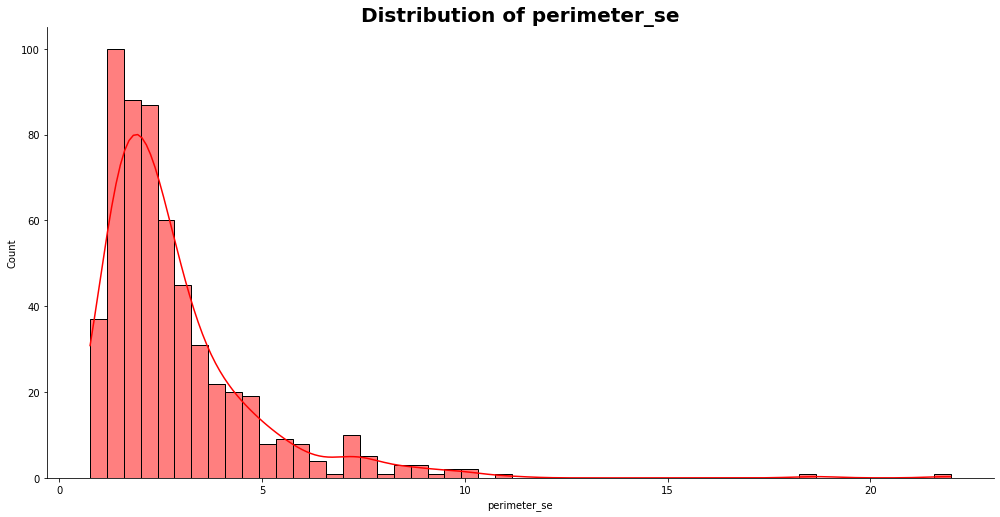

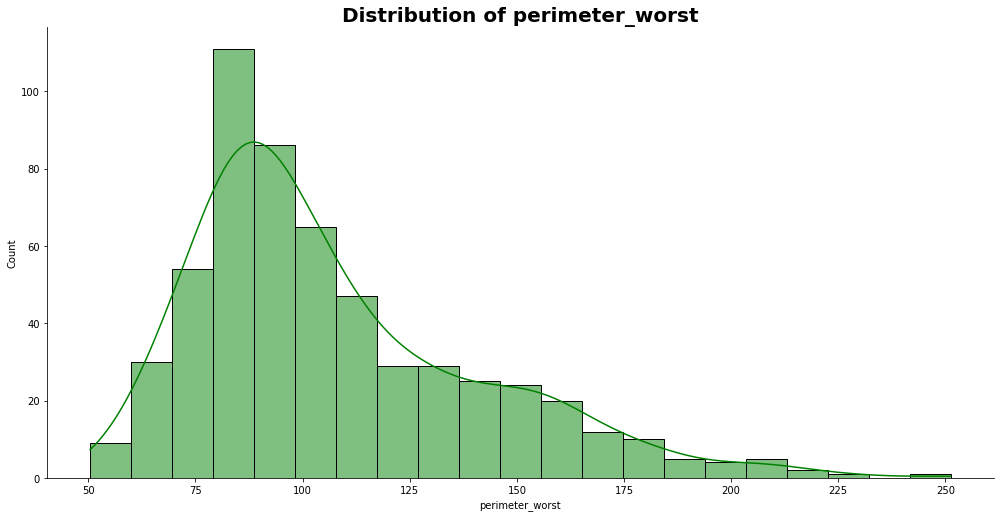

In [41]:
plot_hist(df,'perimeter_mean','blue')
plot_hist(df,'perimeter_se','red')
plot_hist(df,'perimeter_worst','green')

The perimeter_mean is normally distributed while the preimeter_se and perimeter_worst are skewed to the left

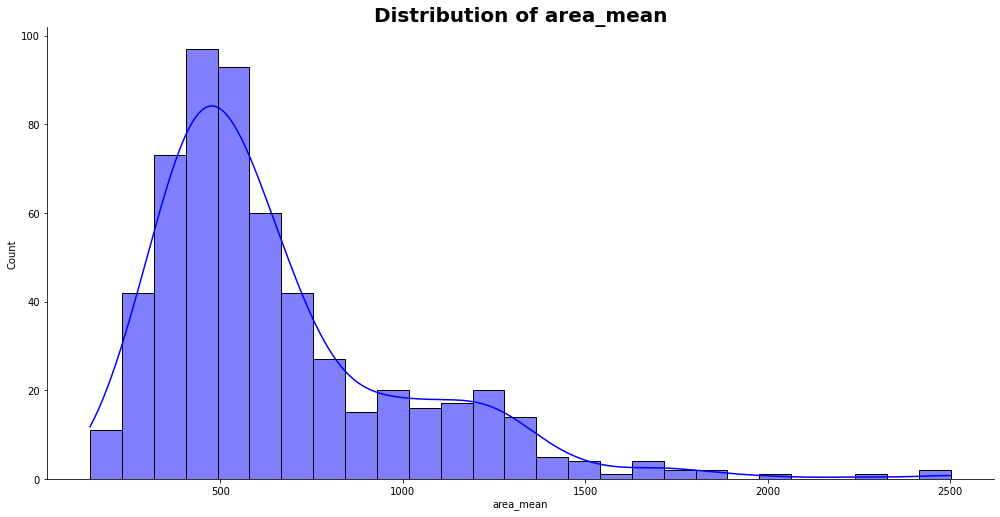

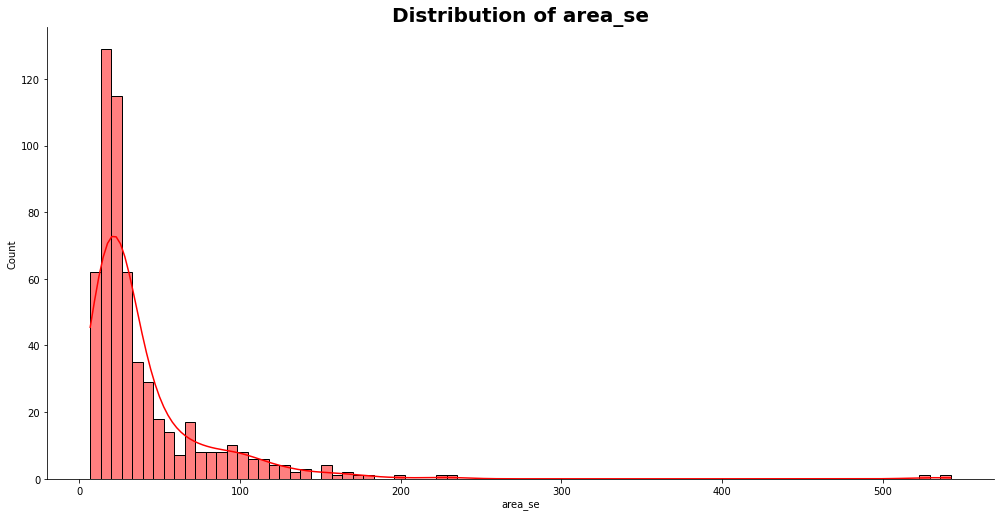

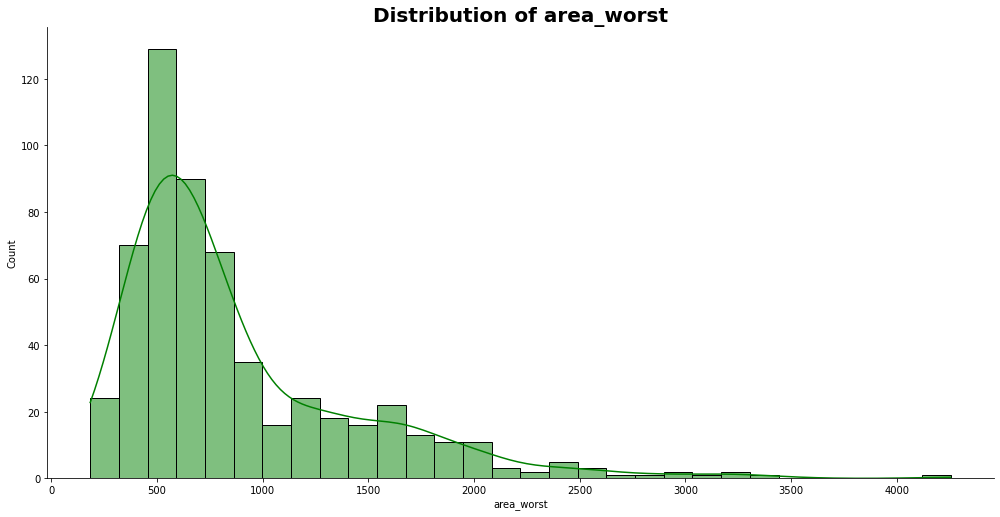

In [42]:
plot_hist(df,'area_mean','blue')
plot_hist(df,'area_se','red')
plot_hist(df,'area_worst','green')

All the area attributes are skewed to the left

### An analysis of the number of malignant and benign tumors


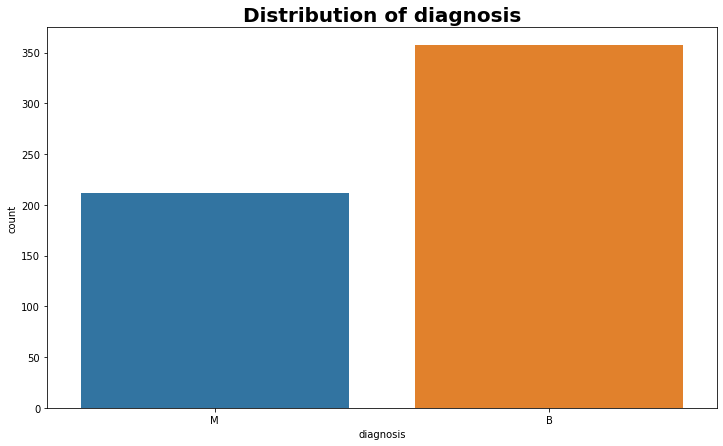

In [43]:
plot_count(df, 'diagnosis')

There are around 200 malignant tumors(cancer) and around 350 benign tumors(no cancer)

## Multivariate Analysis

#### Relationship between the type of tumors and the radius

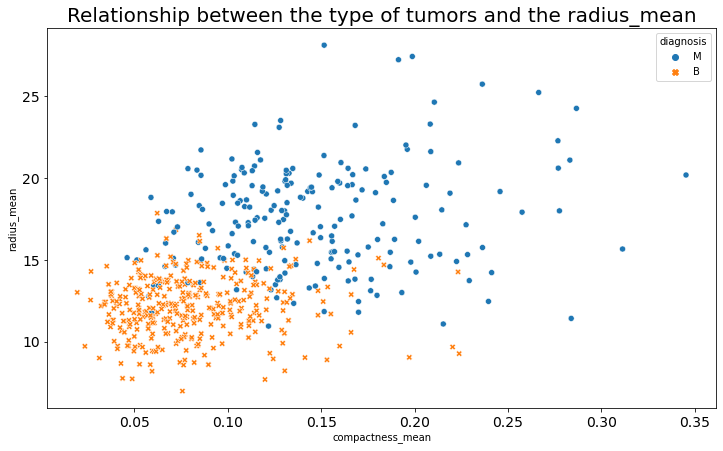

In [53]:
plot_scatter(df, 'compactness_mean', 'radius_mean', 'Relationship between the type of tumors and the radius_mean','diagnosis', 'diagnosis')

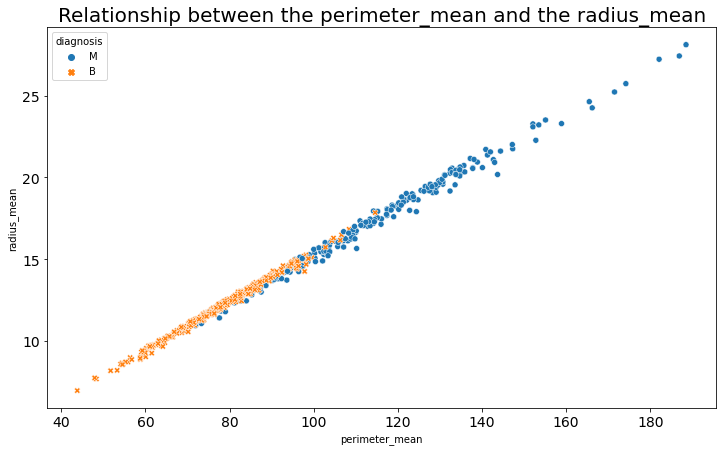

In [48]:
plot_scatter(df, 'perimeter_mean', 'radius_mean', 'Relationship between the perimeter_mean and the radius_mean','diagnosis', 'diagnosis')

The perimeter_mean and radius_mean have a positive linear correlation

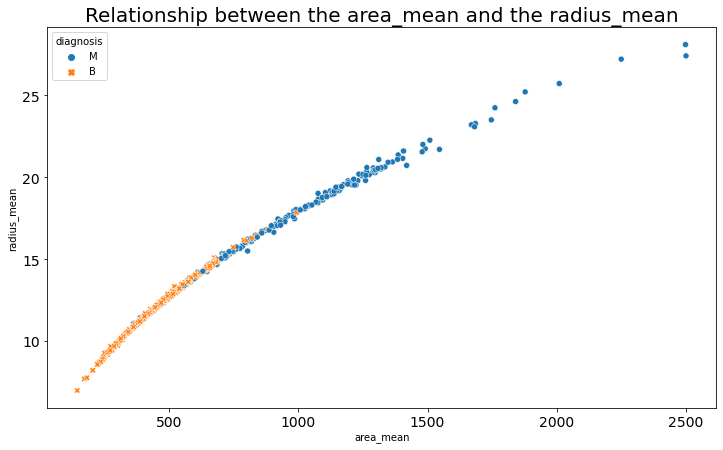

In [61]:
plot_scatter(df, 'area_mean', 'radius_mean', 'Relationship between the area_mean and the radius_mean','diagnosis', 'diagnosis')

There is a positive linear relationship between the area mean and radius mean

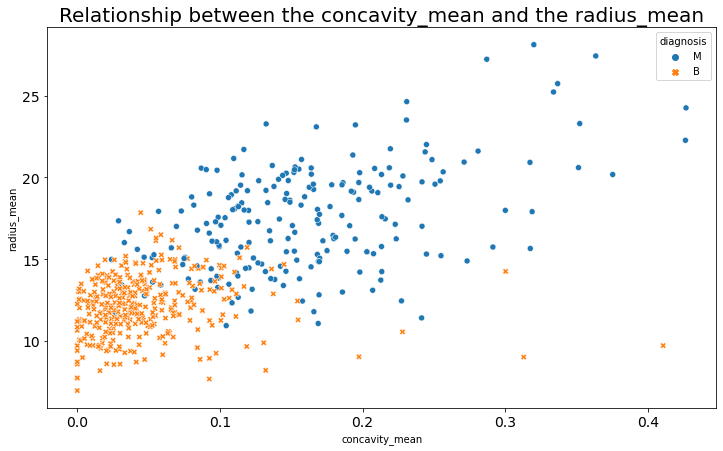

In [60]:
plot_scatter(df, 'concavity_mean', 'radius_mean', 'Relationship between the concavity_mean and the radius_mean','diagnosis', 'diagnosis')

There is no relationship between cancavity mean and radius mean

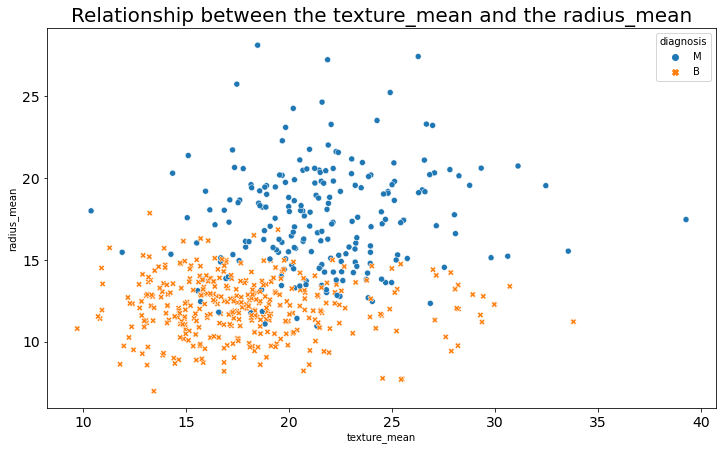

In [59]:
plot_scatter(df, 'texture_mean', 'radius_mean', 'Relationship between the texture_mean and the radius_mean','diagnosis', 'diagnosis')

There is no relationship between the texture mean and radius mean

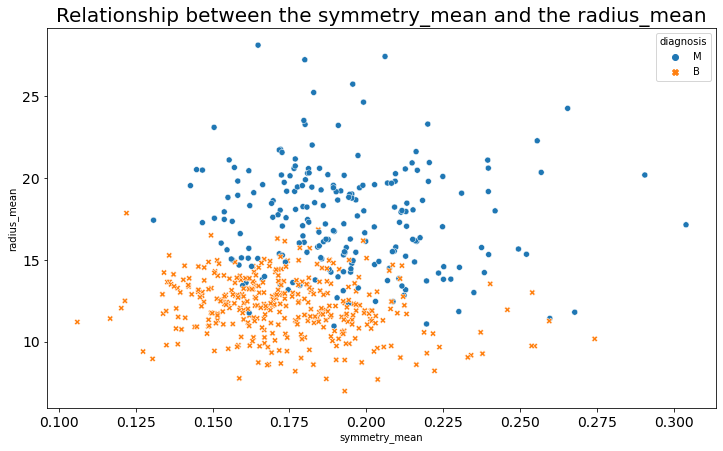

In [58]:
plot_scatter(df, 'symmetry_mean', 'radius_mean', 'Relationship between the symmetry_mean and the radius_mean','diagnosis', 'diagnosis')

There is no relationship radius mean and symmetry mean

#### Scatterplots show possible associations or relationships between two variables. However, just because the graph shows something is going on, it doesn’t mean that a cause-and-effect relationship exists.

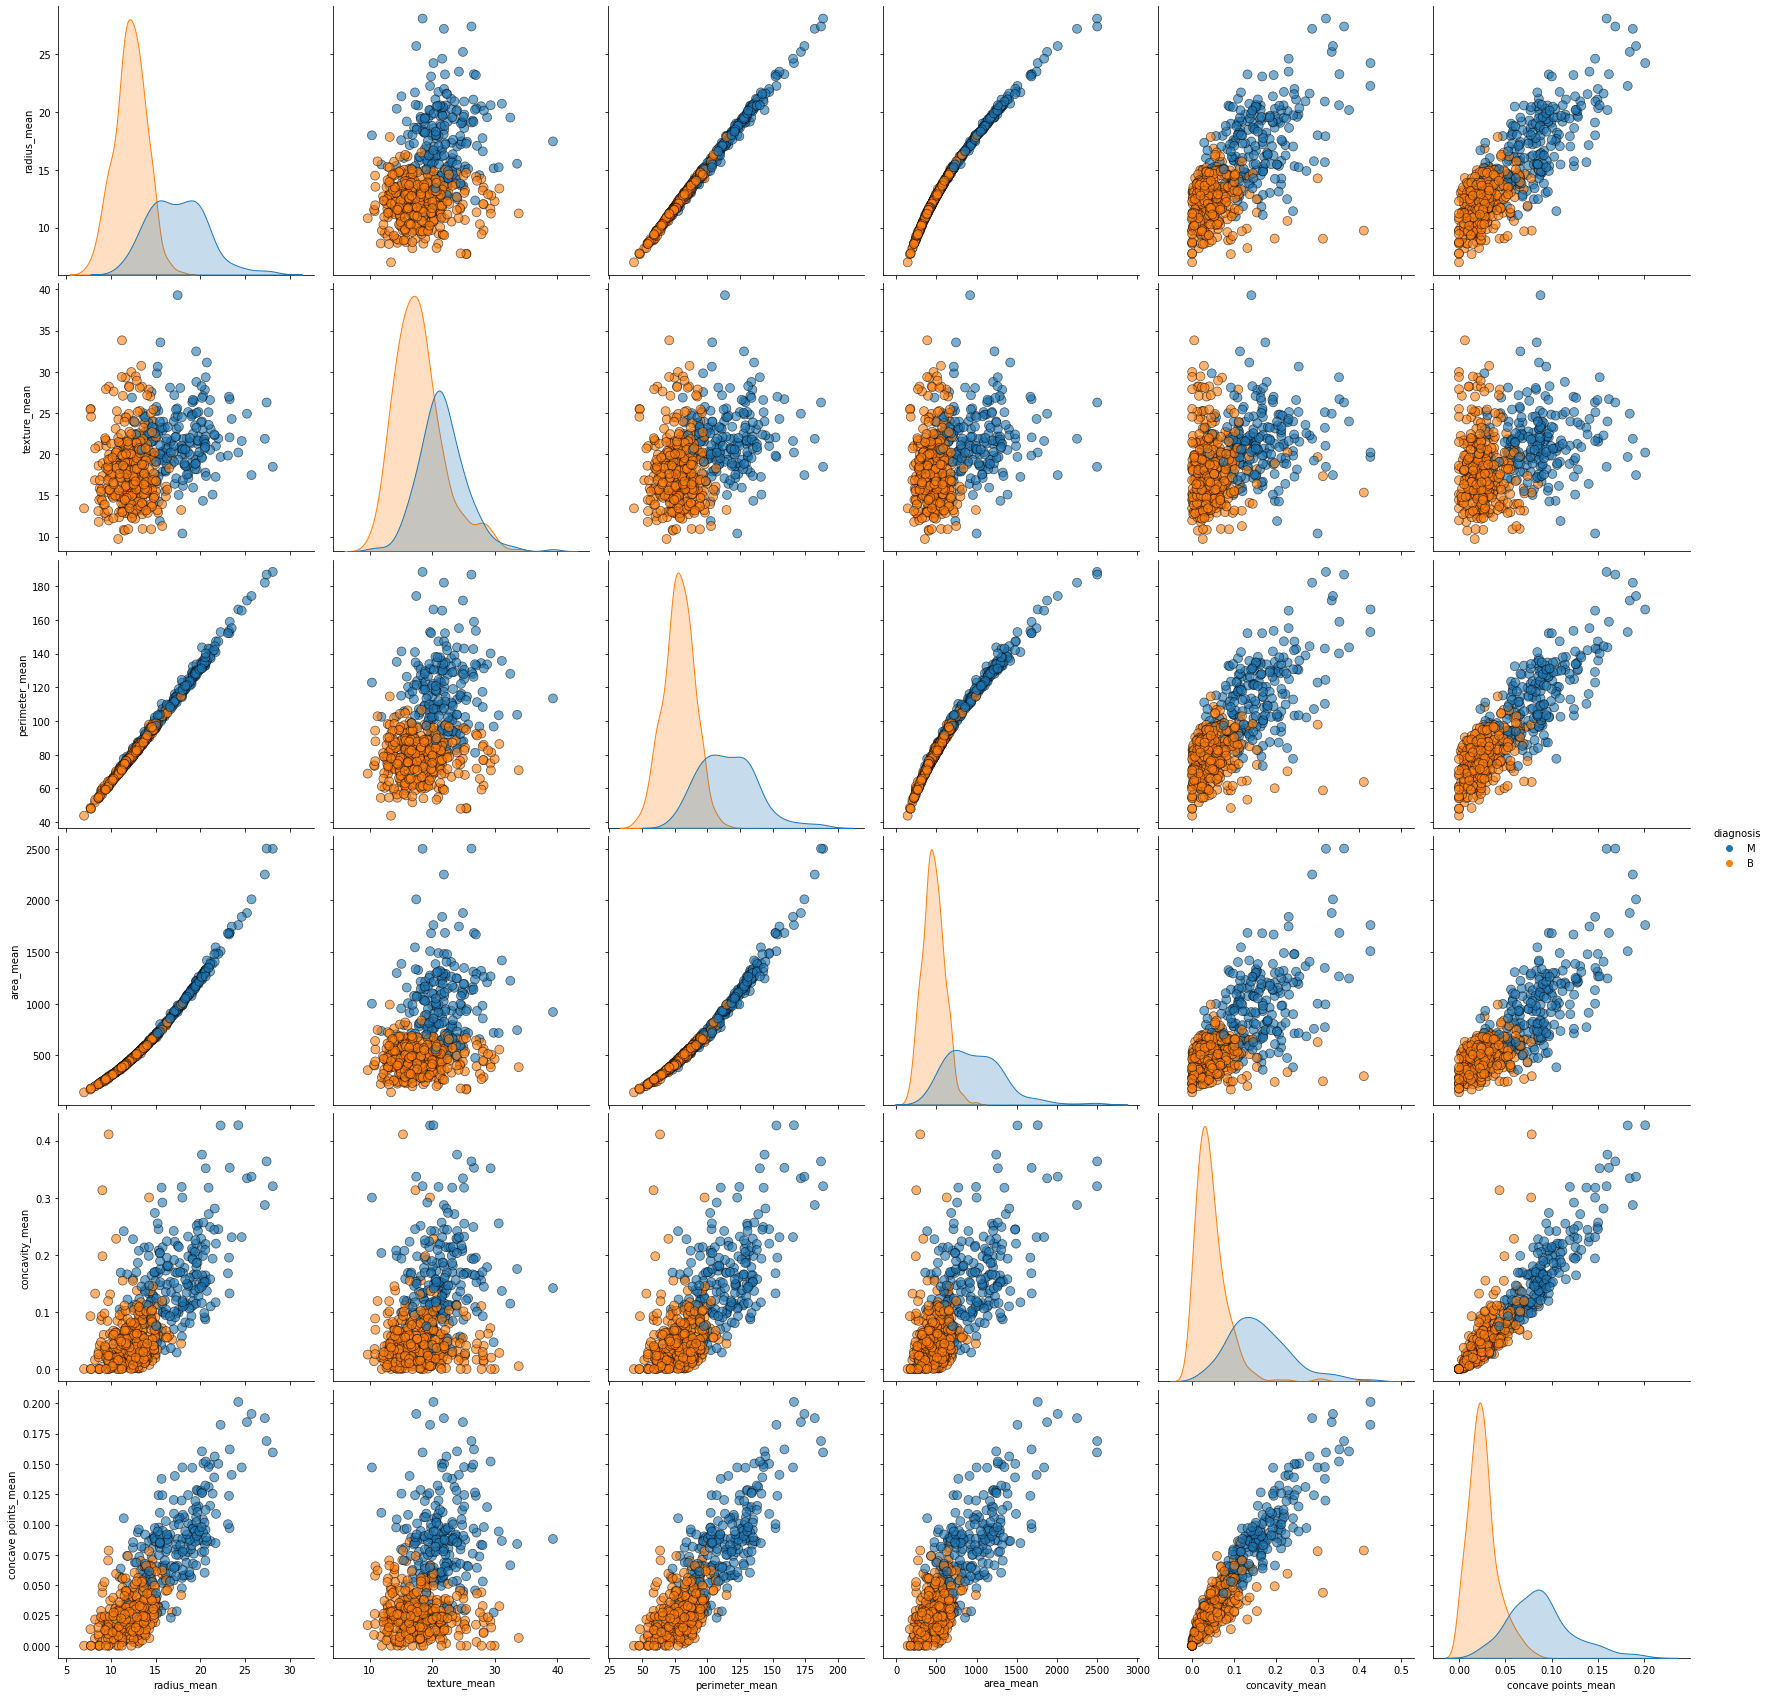

In [66]:
mean_df=df[['diagnosis','radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean','concavity_mean','concave points_mean']]

sns.pairplot(mean_df, hue = 'diagnosis', diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             height=4)      

## Outliers

### Detecting Outliers

In [72]:
# Identifying outliers using IQR score
def IQR_Score(df:pd.DataFrame):
    """This function prints out the IQR Score of each of 
    the columns/ features"""
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    print(IQR)



In [73]:
IQR_Score(df)

radius_mean                  4.080000
texture_mean                 5.630000
perimeter_mean              28.930000
area_mean                  362.400000
smoothness_mean              0.018930
compactness_mean             0.065480
concavity_mean               0.101140
concave points_mean          0.053690
symmetry_mean                0.033800
fractal_dimension_mean       0.008420
radius_se                    0.246500
texture_se                   0.640100
perimeter_se                 1.751000
area_se                     27.340000
smoothness_se                0.002977
compactness_se               0.019370
concavity_se                 0.026960
concave points_se            0.007072
symmetry_se                  0.008320
fractal_dimension_se         0.002310
radius_worst                 5.780000
texture_worst                8.640000
perimeter_worst             41.290000
area_worst                 568.700000
smoothness_worst             0.029400
compactness_worst            0.191900
concavity_wo

Now that the IQR Scores for each column are present, the outliers in each column can be identified. The following code will output boolean values. A False value means these values are valid while True shows the presence of an outlier


In [74]:
print(df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))

SyntaxError: unmatched ')' (Temp/ipykernel_13464/2446234939.py, line 1)